In [89]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/home/cusp/df1676/PUIdata'

In [9]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isdir(os.getenv("PUIDATA")):
        os.system('mkdir '+ os.getenv("PUIDATA"))
    os.system("cp "+ datestring + "-citibike-tripdata.csv" + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv")
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        #os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        if int(datestring) < 201409:
            os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        
        if int(datestring) < 201307:
            print ("Warning: Not Avaliable")

In [10]:
#datestring = raw_input("Input Year and Month (eg. 201510): ")
datestring = str(201502)
getCitiBikeCSV(datestring)

In [18]:
df = pd.read_csv(datestring + '-citibike-tripdata.csv')
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2


In [323]:
df['age'] = 2015 - df['birth year']
df.age.dropna(how='any' , inplace=True)
print (df.age.mean(),df.age.std())

39.7119688898 11.7340092128


In [324]:
bins = np.arange(df.age.min()-1, df.age.max()+1, 1)
age_group = df.age.groupby(age).agg([count_nonzero])
age_group_cumsum = df.age.groupby(df.age).agg([count_nonzero]).cumsum()
#age_group_cumsum = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).cumsum()
age_group_cumsum_normalization = age_group_cumsum /age_group_cumsum.max()

#x = np.arange(df.age.min()*1.0, df.age.max()*1.0)
xx = list(set(list(df.age)))
y = scipy.stats.norm.cdf(xx, loc=df.age.mean(), scale=df.age.std())

d= np.abs(age_group_cumsum_normalization.count_nonzero - y)

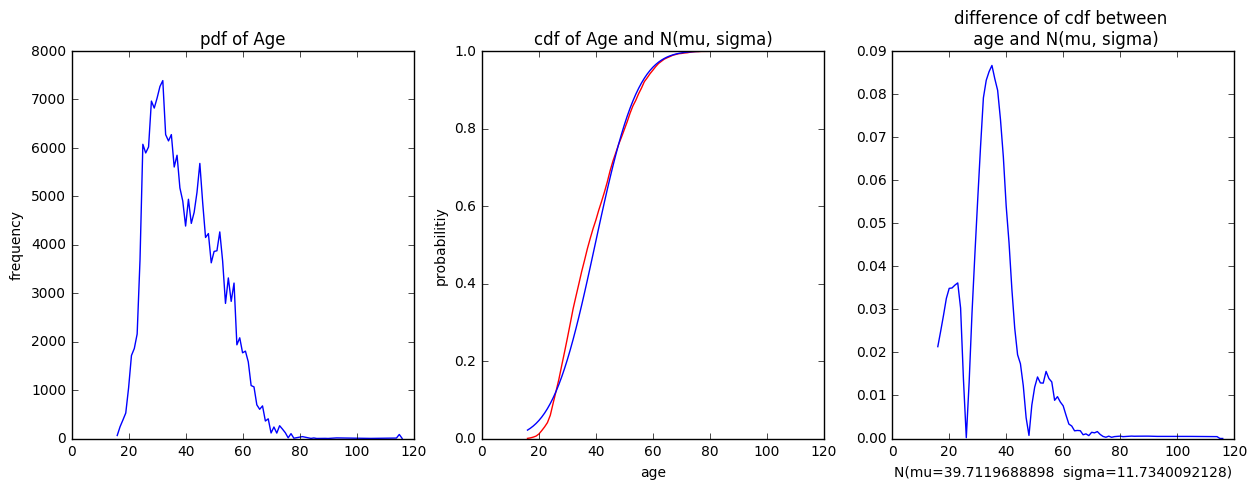

In [325]:
fig = pl.figure(figsize=(15,5))

ax1=fig.add_subplot(131)
ax1.plot(age_group)
pl.title("pdf of Age")
pl.ylabel("frequency")

ax2 = fig.add_subplot(132)
ax2.plot(age_group_cumsum_normalization,'red')
ax2.plot(xx,y,'b')
pl.title("cdf of Age and N(mu, sigma)")
pl.xlabel("age")
pl.ylabel("probabilitiy")

ax3=fig.add_subplot(133)
ax3.plot(xx,d)
pl.title("difference of cdf between \n age and N(mu, sigma)")
pl.xlabel("N(mu={}  sigma={})".format(df.age.mean(), df.age.std()))

In [343]:
scipy.stats.kstest(df.age, 'norm', args=(age.mean(), age.std()))

KstestResult(statistic=0.086644760344532668, pvalue=0.0)

In [328]:
scipy.stats.anderson(df.age, 'norm')

AndersonResult(statistic=1838.2805286566727, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [329]:
import statsmodels.stats.diagnostic
statsmodels.stats.diagnostic.normal_ad(age)

(1838.2805286566727, 0.0)

In [506]:
y = scipy.stats.expon.cdf(xx,loc=16,scale=30)#df.age.mean()
d= np.abs(age_group_cumsum_normalization.count_nonzero - y)

In [507]:
y

array([ 0.        ,  0.0327839 ,  0.06449301,  0.09516258,  0.12482668,
        0.15351828,  0.18126925,  0.20811043,  0.23407166,  0.25918178,
        0.28346869,  0.30695938,  0.32967995,  0.35165566,  0.37291091,
        0.39346934,  0.41335378,  0.43258633,  0.45118836,  0.46918055,
        0.48658288,  0.5034147 ,  0.5196947 ,  0.53544098,  0.55067104,
        0.56540179,  0.57964962,  0.59343034,  0.60675928,  0.61965124,
        0.63212056,  0.64418108,  0.65584621,  0.66712892,  0.67804173,
        0.68859678,  0.69880579,  0.70868011,  0.71823071,  0.72746821,
        0.73640286,  0.7450446 ,  0.75340304,  0.76148745,  0.76930682,
        0.77686984,  0.78418492,  0.79126018,  0.79810348,  0.80472244,
        0.8111244 ,  0.81731648,  0.82330555,  0.82909829,  0.83470111,
        0.84012025,  0.84536174,  0.85043138,  0.85533482,  0.86007751,
        0.86466472,  0.86910154,  0.8733929 ,  0.88155817,  0.88544116,
        0.89634287,  0.89974116,  0.90302803,  0.91225613,  0.91

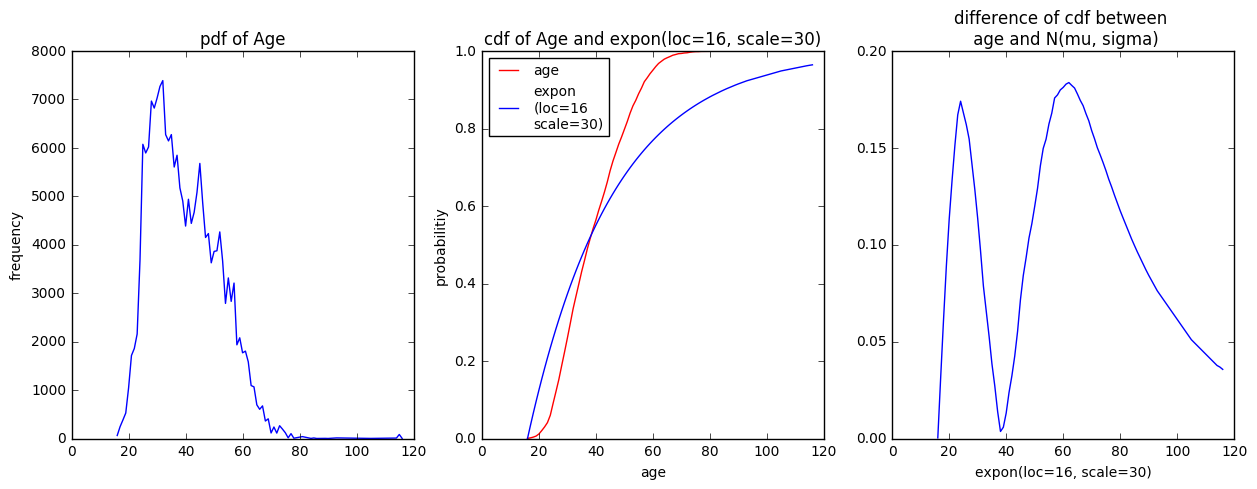

In [513]:
fig = pl.figure(figsize=(15,5))

ax1=fig.add_subplot(131)
ax1.plot(age_group)
pl.title("pdf of Age")
pl.ylabel("frequency")

ax2 = fig.add_subplot(132)
ax2.plot(age_group_cumsum_normalization,'red',label="age")
ax2.plot(xx,y,'b',label="expon\n(loc=16\nscale=30)")
pl.title("cdf of Age and expon(loc=16, scale=30)")
pl.xlabel("age")
pl.ylabel("probabilitiy")
pl.legend(loc="upper left",fontsize=10)

ax3=fig.add_subplot(133)
ax3.plot(xx,d)
pl.title("difference of cdf between \n age and N(mu, sigma)")
pl.xlabel("expon(loc=16, scale=30)")

In [365]:
#scipy.stats.kstest(df.age, "poisson", args=(df.age.mean(),df.age.mean()))

In [515]:
scipy.stats.kstest(df.age, "expon", args=(16,30))

KstestResult(statistic=0.19919092332613159, pvalue=0.0)

## 

In [421]:
#scipy.stats.entropy(df.age, y)

In [440]:
scipy.stats.anderson(df.age, "expon")

AndersonResult(statistic=45108.548509756743, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

##